In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.stats.contingency_tables import StratifiedTable

import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import numpy as np 
import pylab 
import scipy.stats as stats
from scipy.stats import norm

In [2]:
users_test = pd.read_csv('Проект_3_users_test.csv', sep=';')

In [3]:
users_control_2 = pd.read_csv('Проект_3_users_control_2.csv', sep=';')

In [4]:
users_control_1 = pd.read_csv('Проект_3_users_control_1.csv', sep=';')

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [5]:
trans_test = pd.read_csv('Проект_3_transactions_test.csv', sep=';')

In [6]:
trans_test.head()

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [7]:
trans_control_2 = pd.read_csv('Проект_3_transactions_control_2.csv', sep=';')

In [8]:
trans_control_1 = pd.read_csv('Проект_3_transactions_control_1.csv', sep=';')

In [9]:
users_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4264 non-null   int64  
 1   age               4264 non-null   int64  
 2   attraction_coeff  4264 non-null   int64  
 3   coins             61 non-null     float64
 4   country           4264 non-null   object 
 5   visit_days        2900 non-null   object 
 6   gender            4264 non-null   int64  
 7   age_filter_start  4264 non-null   int64  
 8   age_filter_end    4264 non-null   int64  
 9   views_count       4264 non-null   int64  
 10  was_premium       411 non-null    float64
 11  is_premium        191 non-null    float64
 12  total_revenue     4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [10]:
users_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [11]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [12]:
trans_test.shape

(273, 8)

In [13]:
users_test.shape

(4308, 13)

In [14]:
users_control_2.shape

(4264, 13)

Тест и контроль примерно равны по количеству наблюдений, это хорошо

In [15]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [16]:
users_test.uid.nunique()

4308

In [17]:
users_test.query("total_revenue == 0").uid.nunique()

4162

In [18]:
4308-4162

146

In [19]:
trans_test.uid.nunique()

146

In [20]:
trans_control_1.shape

(1007, 8)

In [21]:
users_control_2.shape

(4264, 13)

In [22]:
users_control_1.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.340000e+03,4340.000000,4340.000000,60.0000,4340.000000,4340.000000,4340.000000,4340.000000,436.0,192.0,4340.000000
mean,8.917578e+08,32.095392,312.048848,1745.9000,0.958065,26.793779,38.553226,44.467512,1.0,1.0,594.761982
std,1.125683e+06,10.257466,320.972130,12902.3577,0.200465,9.405103,15.226951,204.800272,0.0,0.0,7987.922925
min,8.910510e+08,16.000000,0.000000,1.0000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913626e+08,24.000000,0.000000,8.0000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917272e+08,30.000000,238.500000,11.5000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920898e+08,38.000000,518.000000,28.0000,1.000000,32.000000,45.000000,21.000000,1.0,1.0,0.000000
max,9.609370e+08,99.000000,1000.000000,99958.0000,1.000000,96.000000,102.000000,4953.000000,1.0,1.0,486330.000000


судя по среднему gender, 95% пользователей одного пола (1). судя по информации из интернета,
это реальное соотношение М (95%) и Ж (5%) в дейтинговых приложениях. ничего подозрительного в данных не вижу, можно работать

In [23]:
users_control_1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [24]:
users_control_1.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [25]:
users_control_2.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.264000e+03,4264.000000,4264.000000,61.000000,4264.000000,4264.000000,4264.000000,4264.000000,411.0,191.0,4264.000000
mean,8.917694e+08,32.046201,317.957317,18.147541,0.954268,26.954268,38.906895,45.064493,1.0,1.0,450.384146
std,2.520759e+06,10.170721,326.191737,35.439543,0.208927,9.546657,15.955574,318.188992,0.0,0.0,2859.242228
min,8.910509e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913453e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917205e+08,30.000000,250.000000,10.000000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920735e+08,38.000000,548.500000,20.000000,1.000000,32.000000,45.000000,20.000000,1.0,1.0,0.000000
max,1.053059e+09,99.000000,1000.000000,271.000000,1.000000,94.000000,99.000000,16157.000000,1.0,1.0,81796.000000


In [26]:
users_test.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.308000e+03,4308.000000,4308.000000,49.000000,4308.000000,4308.000000,4308.000000,4308.000000,408.0,157.0,4308.000000
mean,8.917437e+08,31.889276,316.411328,229.836735,0.953110,26.701486,38.248839,50.391133,1.0,1.0,534.080316
std,4.547670e+05,10.245287,323.373725,1205.819471,0.211427,9.390851,15.344562,318.676437,0.0,0.0,4371.682632
min,8.910511e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913621e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917290e+08,30.000000,250.000000,9.000000,1.000000,24.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920952e+08,38.000000,520.250000,72.000000,1.000000,32.000000,44.000000,22.000000,1.0,1.0,0.000000
max,9.051586e+08,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.0,1.0,129870.000000


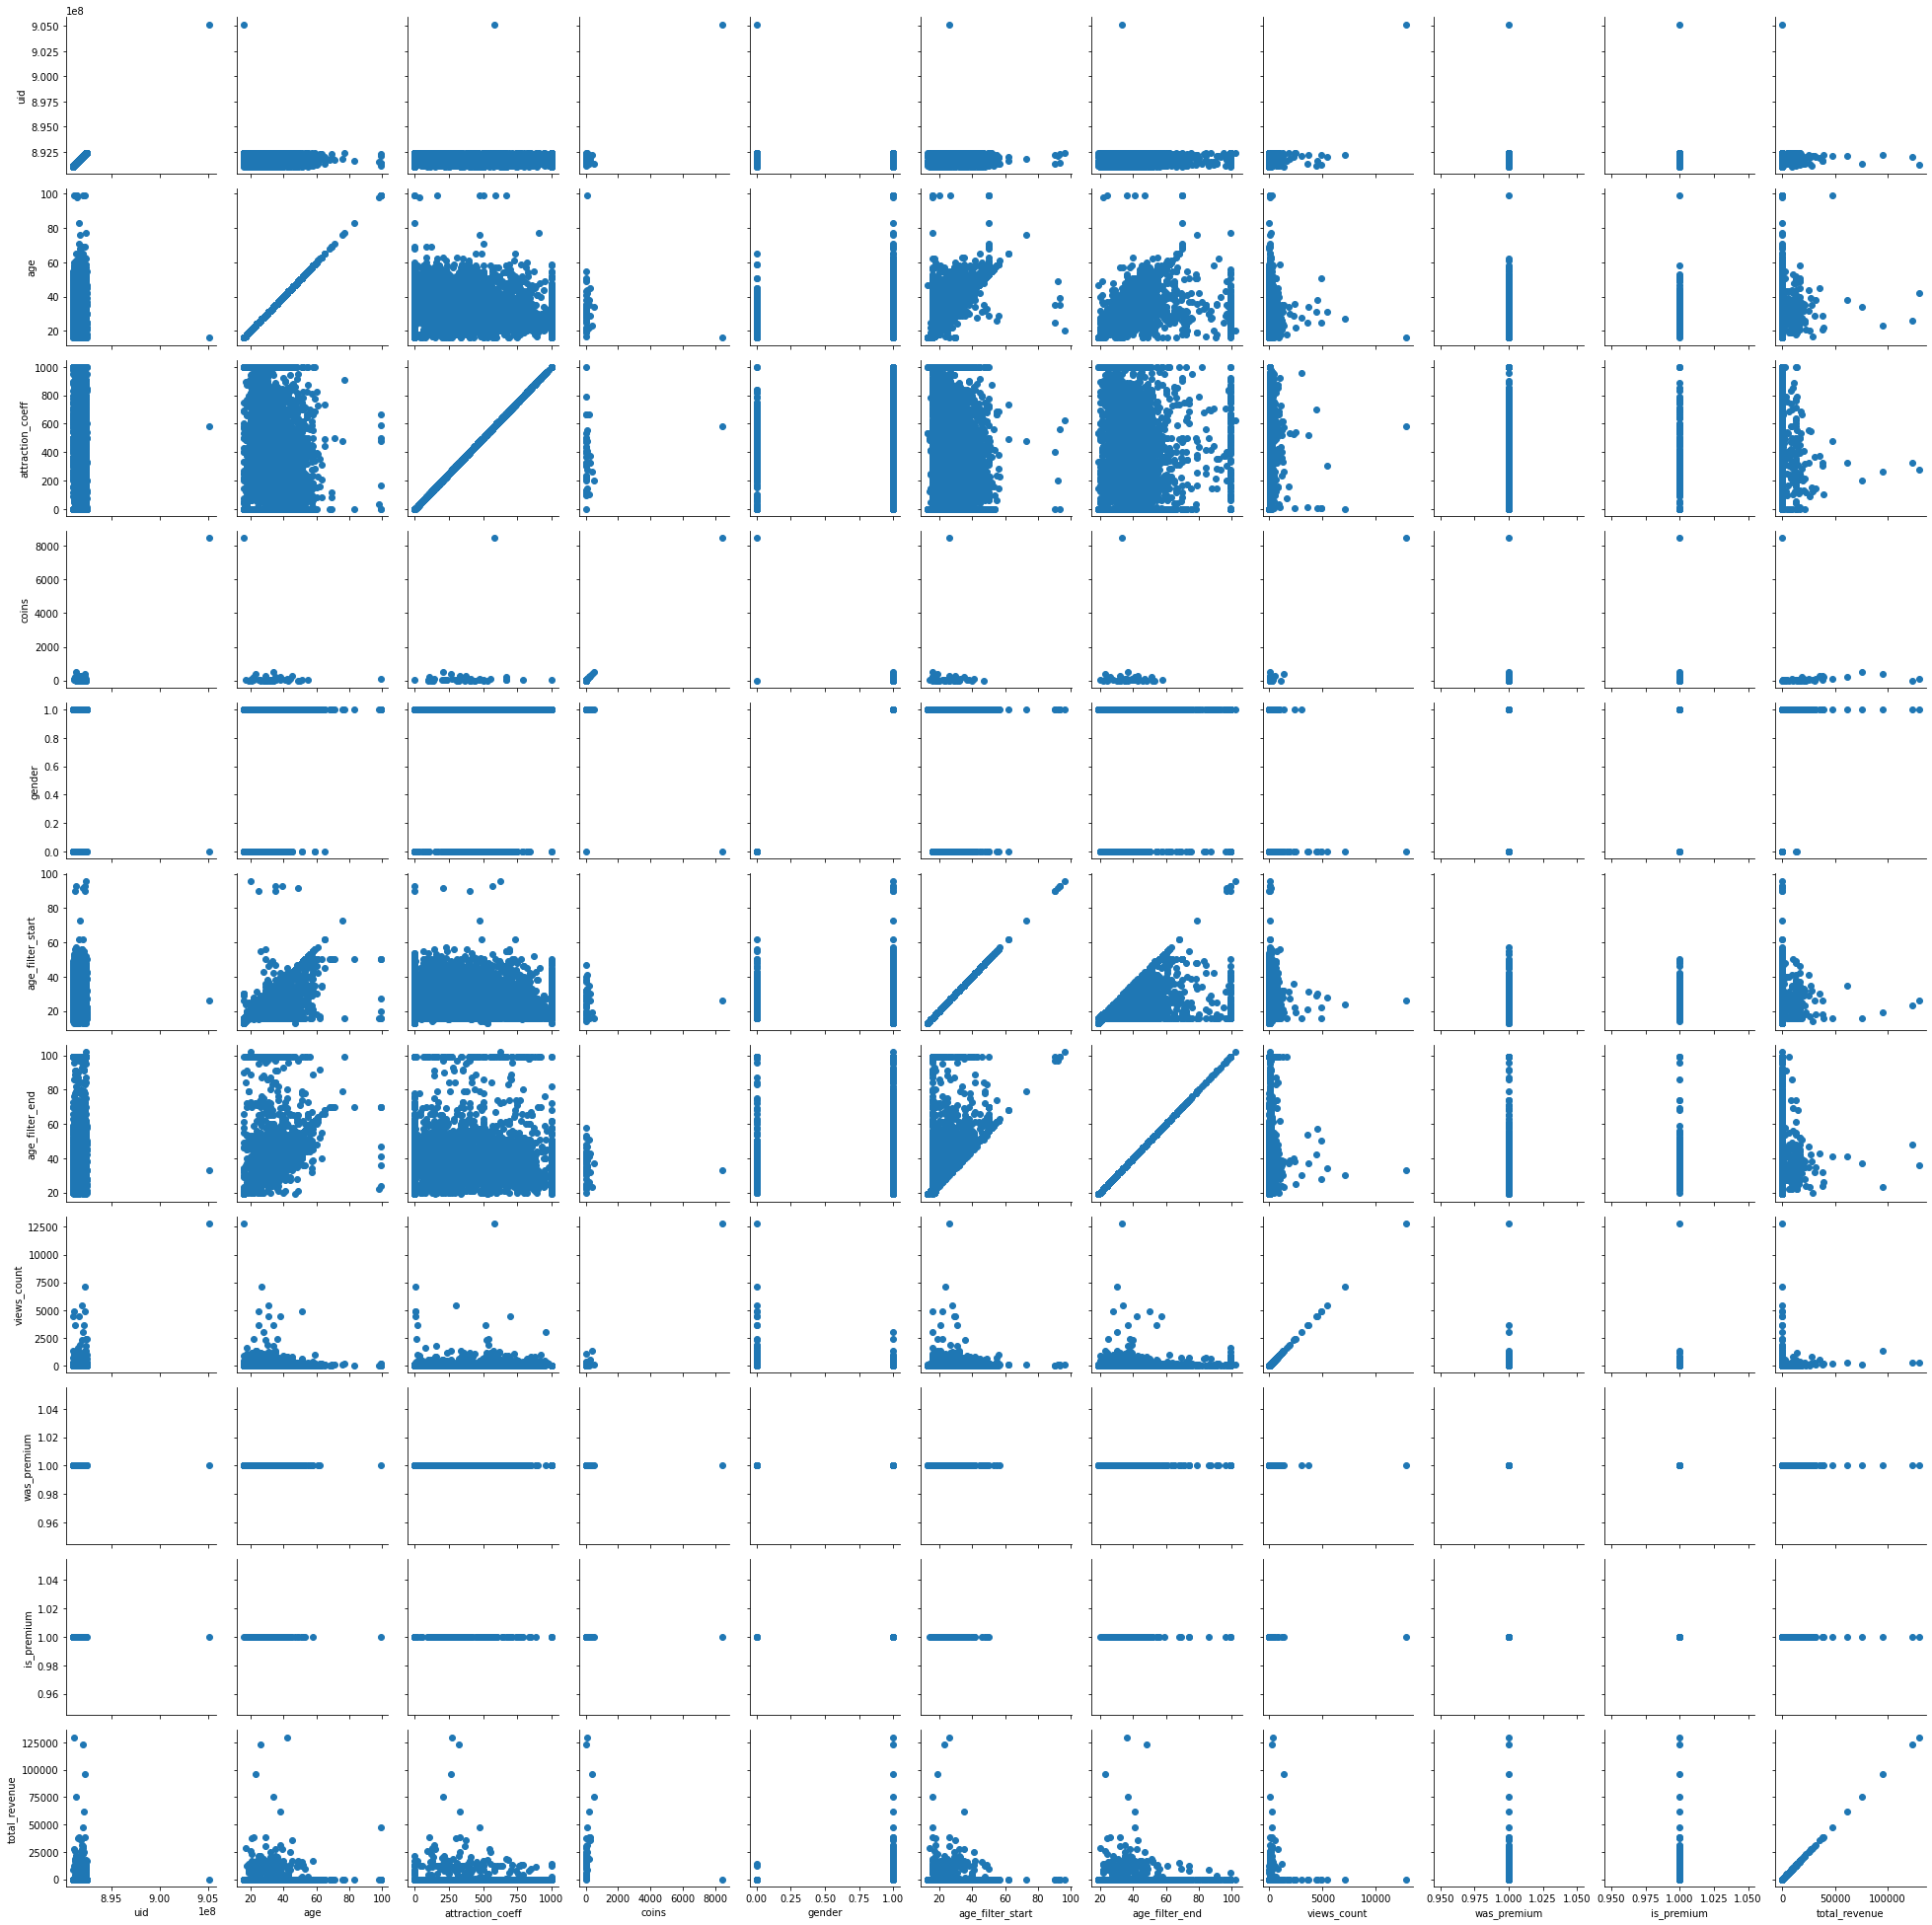

In [27]:
pair_grid_plot = sns.PairGrid(users_test)
pair_grid_plot.map(plt.scatter)

корелляций по скаттерплотам не видно, только показатели, связанные с возрастом (возраст, начало и конец диапазона по возрасту)

посмотрим, как распределен возраст

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


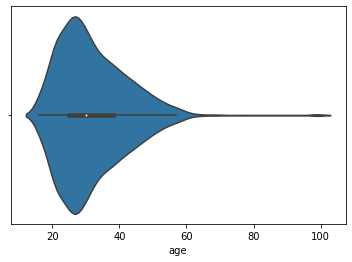

In [28]:
sns.violinplot(users_test['age']) ;

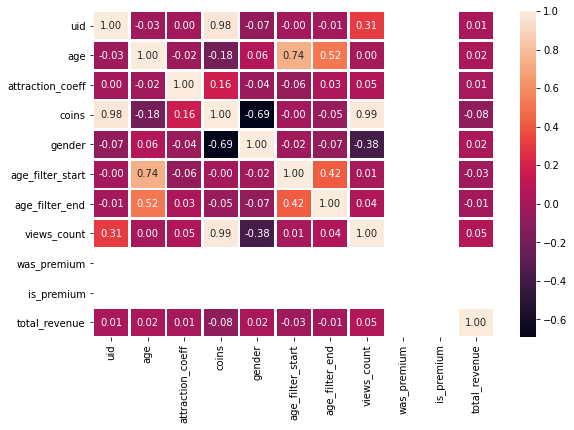

In [29]:
corr = users_test.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

корелляция наблюдается в факторах, которые очевидно связаны между собой: возраст и границы фильтра по возрасту, выручка и количество монет. есть еще высокий коэффициент корелляции по полу. скорее всего, больше тратят мужчины (которых 95%). проверим

In [30]:
users_test.groupby('gender', as_index=False).agg({'total_revenue': 'mean'})

,gender,total_revenue
0,0,134.054455
1,1,553.760107


In [31]:
users_control_1.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.340000e+03,4340.000000,4340.000000,60.0000,4340.000000,4340.000000,4340.000000,4340.000000,436.0,192.0,4340.000000
mean,8.917578e+08,32.095392,312.048848,1745.9000,0.958065,26.793779,38.553226,44.467512,1.0,1.0,594.761982
std,1.125683e+06,10.257466,320.972130,12902.3577,0.200465,9.405103,15.226951,204.800272,0.0,0.0,7987.922925
min,8.910510e+08,16.000000,0.000000,1.0000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913626e+08,24.000000,0.000000,8.0000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917272e+08,30.000000,238.500000,11.5000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920898e+08,38.000000,518.000000,28.0000,1.000000,32.000000,45.000000,21.000000,1.0,1.0,0.000000
max,9.609370e+08,99.000000,1000.000000,99958.0000,1.000000,96.000000,102.000000,4953.000000,1.0,1.0,486330.000000


In [32]:
users_control_2.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.264000e+03,4264.000000,4264.000000,61.000000,4264.000000,4264.000000,4264.000000,4264.000000,411.0,191.0,4264.000000
mean,8.917694e+08,32.046201,317.957317,18.147541,0.954268,26.954268,38.906895,45.064493,1.0,1.0,450.384146
std,2.520759e+06,10.170721,326.191737,35.439543,0.208927,9.546657,15.955574,318.188992,0.0,0.0,2859.242228
min,8.910509e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913453e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917205e+08,30.000000,250.000000,10.000000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920735e+08,38.000000,548.500000,20.000000,1.000000,32.000000,45.000000,20.000000,1.0,1.0,0.000000
max,1.053059e+09,99.000000,1000.000000,271.000000,1.000000,94.000000,99.000000,16157.000000,1.0,1.0,81796.000000


In [33]:
users_test.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.308000e+03,4308.000000,4308.000000,49.000000,4308.000000,4308.000000,4308.000000,4308.000000,408.0,157.0,4308.000000
mean,8.917437e+08,31.889276,316.411328,229.836735,0.953110,26.701486,38.248839,50.391133,1.0,1.0,534.080316
std,4.547670e+05,10.245287,323.373725,1205.819471,0.211427,9.390851,15.344562,318.676437,0.0,0.0,4371.682632
min,8.910511e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913621e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917290e+08,30.000000,250.000000,9.000000,1.000000,24.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920952e+08,38.000000,520.250000,72.000000,1.000000,32.000000,44.000000,22.000000,1.0,1.0,0.000000
max,9.051586e+08,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.0,1.0,129870.000000


среднее total_revenue в тесте больше, кажется, выручка подросла после изменений?

цену меняли для новых пользователей, а значит, нам не подходят те, кто уже оформлял премиум
хотя бы так уберем лишнее

In [34]:
users_test_new = users_test.query("(was_premium == 1 and is_premium == 1) or (was_premium == 'NaN' and is_premium == 'NaN')")
users_control_1_new = users_control_1.query("(was_premium == 1 and is_premium == 1) or (was_premium == 'NaN' and is_premium == 'NaN')")
users_control_2_new = users_control_2.query("(was_premium == 1 and is_premium == 1) or (was_premium == 'NaN' and is_premium == 'NaN')")

и создадим датасет с данными только тех, кто оплачивал покупки в приложении

In [35]:
users_control_1_paid = users_control_1_new.query("total_revenue > 0")

In [36]:
users_control_2_paid = users_control_2_new.query("total_revenue > 0")

In [37]:
users_test_paid = users_test_new.query("total_revenue > 0")

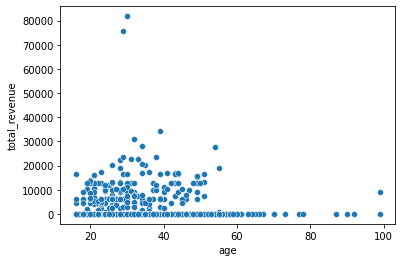

In [38]:
sns.scatterplot(data=users_control_2, y='total_revenue', x='age') ;

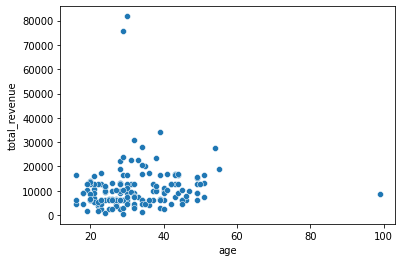

In [39]:
sns.scatterplot(data=users_control_2_paid, y='total_revenue', x='age') ;

видим небольшую положительную корелляцию общей выручки с возрастом

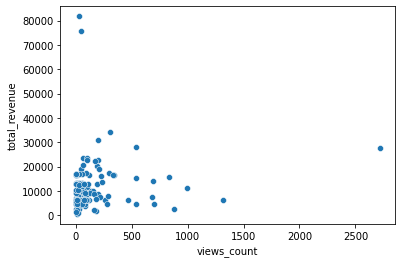

In [40]:
sns.scatterplot(data=users_control_2_paid, y='total_revenue', x='views_count') ;

видим, как много пользователей с малым количеством просмотров, но видимой корелляции нет

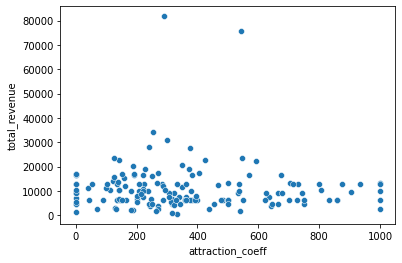

In [41]:
sns.scatterplot(data=users_control_2_paid, y='total_revenue', x='attraction_coeff') ;

попробуем вычислить, в каких именно странах подняли стоимость премимум-подписки

In [42]:
trans_test.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [43]:
trans_test_prem = trans_test.query("product_type == 'premium_no_trial'")

In [44]:
trans_control_1_prem = trans_control_1.query("product_type == 'premium_no_trial'")

In [45]:
trans_control_1_prem.query("country == 'Spain'")

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
67,891819399.0,Spain,2017-10-26 23:46:00,2017-11-11 15:25:00,6357.0,147.0,autoreply_message,premium_no_trial
91,891366795.0,Spain,2017-05-11 03:05:00,2017-07-11 22:18:00,6292.0,147.0,popular_users_block,premium_no_trial
219,892061721.0,Spain,2017-10-21 21:48:00,2017-10-21 21:52:00,7930.0,147.0,send_message,premium_no_trial
234,892189932.0,Spain,2017-10-19 02:48:00,2017-10-19 03:09:00,6474.0,147.0,autoreply_message,premium_no_trial
332,891607515.0,Spain,2017-10-31 03:34:00,2017-11-13 15:07:00,6292.0,147.0,popular_users_block,premium_no_trial


In [46]:
trans_test_prem.query("country == 'Spain'")

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
12,891178380,Spain,2017-08-11 03:54:00,2017-09-11 21:53:00,113477,147,promo_09,premium_no_trial
66,892390170,Spain,2017-10-15 01:55:00,2017-10-15 01:59:00,5369,147,autoreply_message,premium_no_trial
74,892205850,Spain,2017-10-18 19:20:00,2017-02-11 00:13:00,5408,147,promo_09,premium_no_trial
136,891564672,Spain,2017-10-31 23:40:00,2017-10-31 23:44:00,6292,147,autoreply_message,premium_no_trial
170,891152790,Spain,2017-08-11 18:39:00,2017-10-11 11:29:00,12597,147,dating,premium_no_trial
247,891352467,Spain,2017-05-11 10:48:00,2017-05-11 10:54:00,6370,147,autoreply_message,premium_no_trial


сравнивая платежи в одной стране с одной страницы, не вижу закономерностей. либо цену меняли во всех странах,
либо только в части, но вычленить их не получится. будем работать со всей массой

In [47]:
trans_test_prem.groupby('country', as_index=False).agg({'revenue': 'median'})

,country,revenue
0,Argentina,12597.0
1,Australia,12597.0
2,Belgium,12597.0
3,Canada,4147.0
4,Chile,8190.0
5,France,7098.0
6,Germany,5167.5
7,Israel,12597.0
8,Italy,7839.0
9,Latvia,6357.0


цену меняли для новых пользователей, а значит, нам не подходят те, кто уже оформлял премиум
хотя бы так уберем лишнее

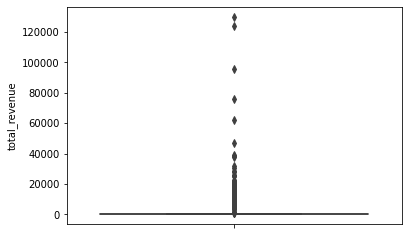

In [48]:
sns.boxplot(data=users_test_new, y='total_revenue') ;

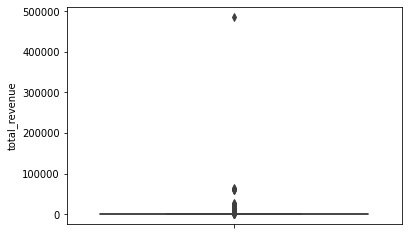

In [49]:
sns.boxplot(data=users_control_1_new, y='total_revenue') ;

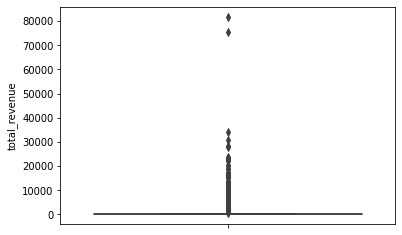

In [50]:
sns.boxplot(data=users_control_2_new, y='total_revenue') ;

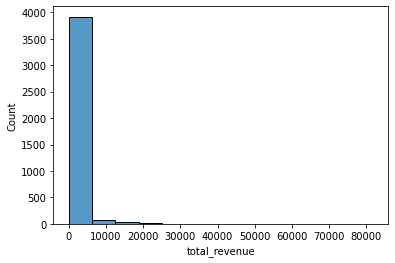

In [51]:
sns.histplot(data=users_control_2_new, x='total_revenue') ;

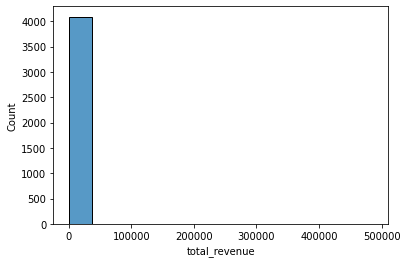

In [52]:
sns.histplot(data=users_control_1_new, x='total_revenue') ;

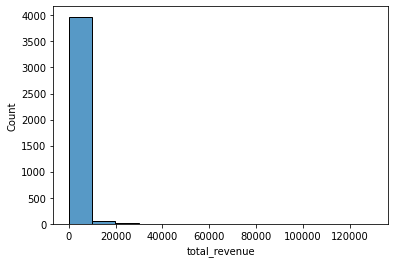

In [53]:
sns.histplot(data=users_test_new, x='total_revenue') ;

In [54]:
stats.shapiro(users_control_2_new.total_revenue)

ShapiroResult(statistic=0.13637471199035645, pvalue=0.0)

распределение не нормальное. попробуем нормализовать

In [55]:
stats.shapiro(users_control_1_new.total_revenue)

ShapiroResult(statistic=0.038281142711639404, pvalue=0.0)

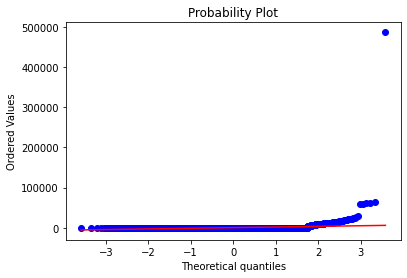

In [56]:
stats.probplot(users_control_1_new.total_revenue, dist="norm", plot=pylab)
pylab.show()

попробуем убрать выброс, чтобы сделать распределение нормальным

In [57]:
users_control_1_new.sort_values('total_revenue', ascending=False).head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
1427,892333905,22,175,3608.0,Italy,"1,2,3,4,5,6,7,15",1,19,25,575,1.0,1.0,486330
2296,892216461,19,293,6.0,United States of America,"1,2,3,5,8,9,11,13,15,16,17,18,19,20,22,23,24,2...",1,16,25,58,1.0,1.0,64298
874,891383310,22,1000,NaN,Turkey,1,1,19,83,4,1.0,1.0,63037
1815,892366260,26,215,20.0,United Kingdom (Great Britain),"1,2,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20...",1,23,29,195,1.0,1.0,63024
284,892421277,22,446,62.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,16,35,130,1.0,1.0,60333


в строке 1427 -- сильный выброс, который видно на графике выше. попробуем его убрать

In [58]:
users_control_1_new = users_control_1_new.drop(1427)

In [59]:
users_control_1_new.sort_values('total_revenue', ascending=False).head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
2296,892216461,19,293,6.0,United States of America,"1,2,3,5,8,9,11,13,15,16,17,18,19,20,22,23,24,2...",1,16,25,58,1.0,1.0,64298
874,891383310,22,1000,NaN,Turkey,1,1,19,83,4,1.0,1.0,63037
1815,892366260,26,215,20.0,United Kingdom (Great Britain),"1,2,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20...",1,23,29,195,1.0,1.0,63024
284,892421277,22,446,62.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,16,35,130,1.0,1.0,60333
2964,892069554,47,185,8.0,United Kingdom (Great Britain),"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,38,1414,NaN,NaN,59267


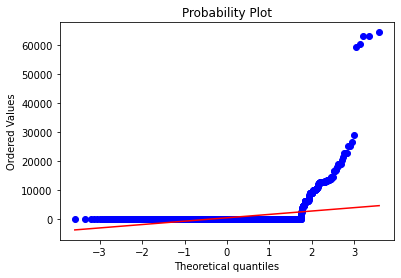

In [60]:
stats.probplot(users_control_1_new.total_revenue, dist="norm", plot=pylab)
pylab.show()

In [61]:
stats.shapiro(users_control_1_new.total_revenue)

ShapiroResult(statistic=0.14064103364944458, pvalue=0.0)

не вышло, выбросов больше на самом деле при ближайшем рассмотрении
выбор статистического метода. как мы видим на графиках выше, в данных много выбросов, а они сильно завышают среднее. т-тест скорее всего нам не подойдет. но на всякий случай проверим гомогенность дисперсий (одно из требований к данным для т-теста)

In [62]:
stats.bartlett (users_control_1_new.total_revenue, users_control_2_new.total_revenue, users_test_new.total_revenue)

BartlettResult(statistic=899.308684879355, pvalue=5.219156439229476e-196)

мы отвергаем нулевую гипотезу о гомогенности дисперсий и окончательно отвергаем т-тест. критерий манна-уитни тоже нам не подходит, т.к. мы хотим получить полезные и интерпретируемые для бизнеса результаты. выбираем бутстрап

a/a test
a/a и a/b тесты проводим, анализируя изменение метрики total_revenue, т.к. при изменении цены на подписку мы хотим увеличить именно выручку. т.к. в наших данных все пользователи, мы анализируем изменение ARPU.
для а/а теста берем т-тест, т.к. 1) мы хотим проверять ту же статистику, что и на а/б тесте (а на нем мы возьмем бутстрап по среднему, т.к. медиана из-за большого количества неплатящих пользователей равна 0) 2) в а/а тесте тоже большое количество симуляций (как в бутстрапе), а значит, влияние выбросов на среднее также нивелируется

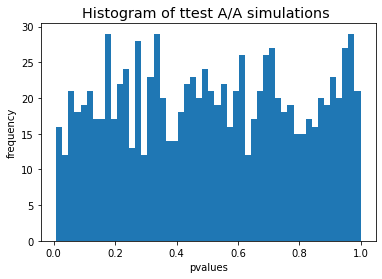

0.03

In [63]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = users_control_1_new.total_revenue.sample(n_s, replace = False).values
    # total_revenue - целевая метрика
    s2 = users_control_2_new.total_revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

а/а тест сошелся, сплитовалка работает корректно. можем применять а/в тест, также по total_revenue

для а/б теста можно взять непараметрический манн-уитни, но, во-первых, его сложно будет интерпретировать для бизнеса, во-вторых, после мы хотим изучать влияние изменений на отдельные группы пользователей (в том числе по квартилям различных параметров). поэтому удобнее будет взять бутстрап

In [64]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

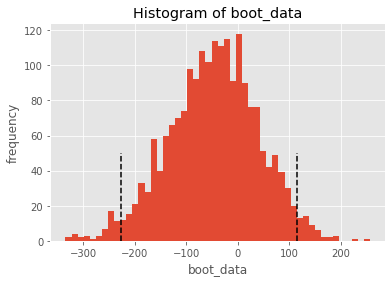

In [65]:
booted_data_mean = get_bootstrap(users_control_1_new.total_revenue, \
                            users_test_new.total_revenue, boot_it = 2000)

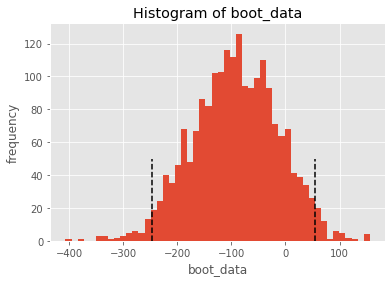

In [66]:
booted_data_mean = get_bootstrap(users_control_2_new.total_revenue, \
                            users_test_new.total_revenue, boot_it = 2000)

0 попадает в доверительный интервал в обоих случаях, не отклоняем нулевую гипотезу

A1+A2/B тест

In [67]:
users_control_new = pd.concat([users_control_1_new, users_control_2_new])

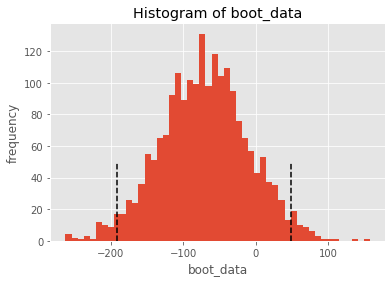

In [68]:
booted_data_mean = get_bootstrap(users_control_new.total_revenue, \
                            users_test_new.total_revenue, boot_it = 2000)

попробуем найти значимые различия среди тех, кто оплачивал покупки в приложении (ARPPU)

In [69]:
users_control_1_paid = users_control_1_new.query("total_revenue > 0")

In [70]:
users_control_2_paid = users_control_2_new.query("total_revenue > 0")

In [71]:
users_test_paid = users_test_new.query("total_revenue > 0")

In [72]:
stats.shapiro(users_control_1_paid.total_revenue)

ShapiroResult(statistic=0.6253739595413208, pvalue=4.581644845475823e-19)

In [73]:
stats.shapiro(users_control_2_paid.total_revenue)

ShapiroResult(statistic=0.6170272827148438, pvalue=8.337671415780577e-19)

In [74]:
stats.shapiro(users_test_paid.total_revenue)

ShapiroResult(statistic=0.5289022326469421, pvalue=1.4428303595633558e-18)

без неплатящих пользователей распределение тоже ненормальное, проверим гомогенность дисперсий

In [75]:
stats.bartlett (users_control_1_paid.total_revenue, users_control_2_paid.total_revenue, users_test_paid.total_revenue)

BartlettResult(statistic=82.99593948436447, pvalue=9.498624747485047e-19)

и дисперсии тоже не дают обратиться к т-тесту. снова будем делать бутстрап

но сначала а/а по ARPPU

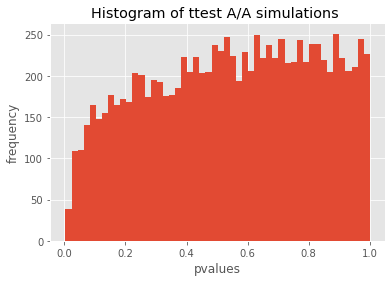

0.0178

In [76]:
n = 100
simulations = 10000 #количество симуляций взяла из конспекта: 
#Тест пересчитывается ≥ 10 тыс. раз при помощи симуляции новых «синтетических» A/A.
n_s = 100
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = users_control_1_paid.total_revenue.sample(n_s, replace = False).values
    # total_revenue - целевая метрика
    s2 = users_control_2_paid.total_revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

FPR меньше 0,05, но распределение неравномерное. т.к. результат промежуточный, попробуем все же провести стат тесты

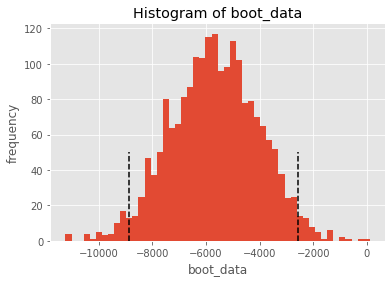

In [77]:
booted_data_mean = get_bootstrap(users_control_2_paid.total_revenue, \
                            users_test_paid.total_revenue, boot_it = 2000)

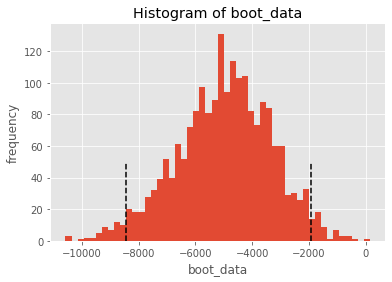

In [78]:
booted_data_mean = get_bootstrap(users_control_1_paid.total_revenue, \
                            users_test_paid.total_revenue, boot_it = 2000)

In [79]:
users_control_paid = pd.concat([users_control_1_paid, users_control_2_paid])

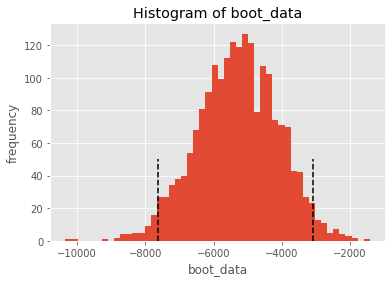

In [80]:
booted_data_mean = get_bootstrap(users_control_paid.total_revenue, \
                            users_test_paid.total_revenue, boot_it = 2000)

видим стат значимые различия в общей выручке среди платящих пользователей. если средняя выручка по всем пользователям (ARPU) примерно такая же, а средняя выручка по платящим пользователям стала больше (ARPPU), логично предположить, что собственно платящих пользователей стало меньше (то есть упала конверсия). проверим

In [81]:
users_control_2_new.is_premium.count() / users_control_2_new.uid.count()

0.04723046488625124

In [82]:
users_control_1_new.is_premium.count() / users_control_1_new.uid.count()

0.04664224664224664

In [83]:
users_test_new.is_premium.count() / users_test_new.uid.count()

0.03869854572344097

визуально наше предположение верно. но проверим субъективные ощущения стат тестом
а/а тест по конверсии. используем хи-квадрат, т.к. имеем дело с категориальной переменной

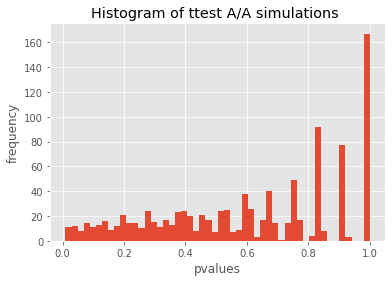

0.024

In [84]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = users_control_1_new.is_premium.sample(n_s, replace = False)
    c1_premium = s1.sum()
    c1_nopremium = n_s - s1.sum()

    s2 = users_control_2_new.is_premium.sample(n_s, replace = False)
    c2_premium = s2.sum()
    c2_nopremium = n_s - s2.sum()
    res.append(stats.chi2_contingency([[c1_premium, c1_nopremium], [c2_premium, c2_nopremium]])[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

FPR меньше 0,05, значит, по конверсии данные засплитованы корректно. проведем а/б тест по конверсии, также хи-квадрат

In [85]:
c1_premium = users_control_1_new.is_premium.sum()
c1_nopremium = users_control_1_new.is_premium.size - users_control_1_new.is_premium.sum()
test_premium = users_test_new.is_premium.sum()
test_nopremium = users_test_new.is_premium.size - users_test_new.is_premium.sum()

T = [[c1_premium, c1_nopremium], [test_premium, test_nopremium]]

In [121]:
stats.chi2_contingency(T,correction=False)

(3.1468232427582,
 0.0760749349787273,
 1,
 array([[ 174.8110893, 3920.1889107],
        [ 173.1889107, 3883.8110893]]))

In [87]:
c2_premium = users_control_2_new.is_premium.sum()
c2_nopremium = users_control_2_new.is_premium.size - users_control_2_new.is_premium.sum()
test_premium = users_test_new.is_premium.sum()
test_nopremium = users_test_new.is_premium.size - users_test_new.is_premium.sum()

T2 = [[c2_premium, c2_nopremium], [test_premium, test_nopremium]]

In [123]:
stats.chi2_contingency(T2, correction=False)

(3.5859086585280857,
 0.05827154047065399,
 1,
 array([[ 173.72077521, 3870.27922479],
        [ 174.27922479, 3882.72077521]]))

In [89]:
c12_premium = users_control_1_new.is_premium.sum() + users_control_2_new.is_premium.sum()
c12_nopremium = (users_control_1_new.is_premium.size + users_control_2_new.is_premium.size) - c12_premium
test_premium = users_test_new.is_premium.sum()
test_nopremium = users_test_new.is_premium.size - users_test_new.is_premium.sum()

T3 = [[c12_premium, c12_nopremium], [test_premium, test_nopremium]]

In [90]:
stats.chi2_contingency(T3,correction=False)

(4.347575353615428,
 0.037061674900261604,
 1,
 array([[ 359.70162348, 7779.29837652],
        [ 179.29837652, 3877.70162348]]))

статзначимая разница только при сравнении суммы двух контрольных групп с тестовой.

теперь проверим, имеет ли смысл нововведение среди отдельных групп пользователей
попробую делить группы по показателям: age, attraction_coeff, views_count, gender
группы будем брать по квартилям

In [91]:
users_control_1.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.340000e+03,4340.000000,4340.000000,60.0000,4340.000000,4340.000000,4340.000000,4340.000000,436.0,192.0,4340.000000
mean,8.917578e+08,32.095392,312.048848,1745.9000,0.958065,26.793779,38.553226,44.467512,1.0,1.0,594.761982
std,1.125683e+06,10.257466,320.972130,12902.3577,0.200465,9.405103,15.226951,204.800272,0.0,0.0,7987.922925
min,8.910510e+08,16.000000,0.000000,1.0000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913626e+08,24.000000,0.000000,8.0000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917272e+08,30.000000,238.500000,11.5000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920898e+08,38.000000,518.000000,28.0000,1.000000,32.000000,45.000000,21.000000,1.0,1.0,0.000000
max,9.609370e+08,99.000000,1000.000000,99958.0000,1.000000,96.000000,102.000000,4953.000000,1.0,1.0,486330.000000


In [92]:
users_test_men = users_test.query("gender == 1")
users_test_women = users_test.query("gender == 0")

In [93]:
users_control_1_men = users_control_1.query("gender == 1")
users_control_1_women = users_control_1.query("gender == 0")

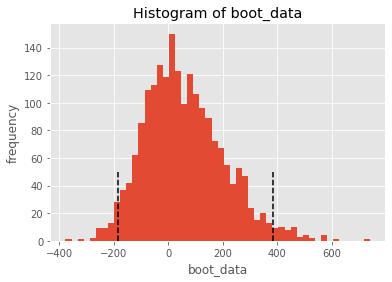

In [94]:
booted_data_mean = get_bootstrap(users_control_1_men.total_revenue, \
                            users_test_men.total_revenue, boot_it = 2000)

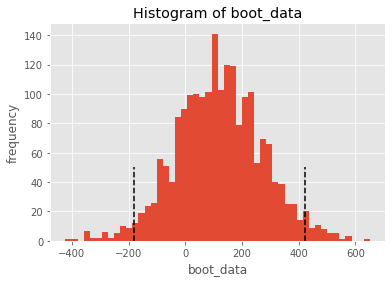

In [95]:
booted_data_mean = get_bootstrap(users_control_1_women.total_revenue, \
                            users_test_women.total_revenue, boot_it = 2000)

значимое различие среди мужчин

In [96]:
users_control_1_men.total_revenue.sum()

2535858

In [97]:
users_test_men.total_revenue.sum()

2273739

In [98]:
users_control_1_men.total_revenue.mean()

609.8744588744589

In [99]:
users_test_men.total_revenue.mean()

553.7601071602533

в тестовой группе мужчины стали меньше платить

In [100]:
users_control_1_age24 = users_control_1.query("age <= 24")
users_control_1_age30 = users_control_1.query("age > 24" and "age <= 30")
users_control_1_age38 = users_control_1.query("age > 30" and "age <= 38")
users_control_1_age99 = users_control_1.query("age >38")

In [101]:
users_control_2_age24 = users_control_2.query("age <= 24")
users_control_2_age30 = users_control_2.query("age > 24" and "age <= 30")
users_control_2_age38 = users_control_2.query("age > 30" and "age <= 38")
users_control_2_age99 = users_control_2.query("age >38")

In [102]:
users_test_age24 = users_test.query("age <= 24")
users_test_age30 = users_test.query("age > 24" and "age <= 30")
users_test_age38 = users_test.query("age > 30" and "age <= 38")
users_test_age99 = users_test.query("age >38")

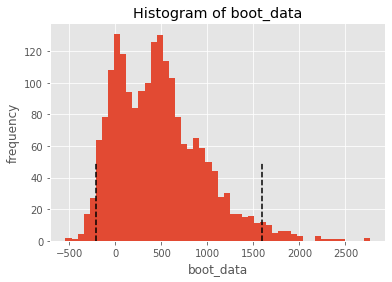

In [103]:
booted_data_mean = get_bootstrap(users_control_1_age24.total_revenue, \
                            users_test_age24.total_revenue, boot_it = 2000)

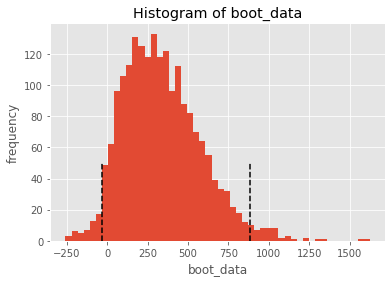

In [104]:
booted_data_mean = get_bootstrap(users_control_1_age30.total_revenue, \
                            users_test_age30.total_revenue, boot_it = 2000)

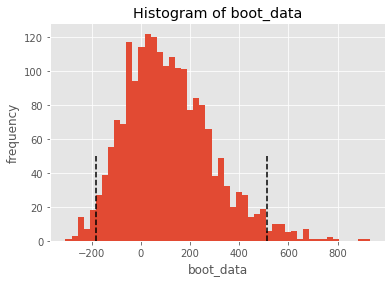

In [105]:
booted_data_mean = get_bootstrap(users_control_1_age38.total_revenue, \
                            users_test_age38.total_revenue, boot_it = 2000)

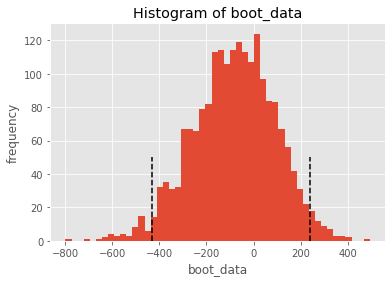

In [106]:
booted_data_mean = get_bootstrap(users_control_1_age99.total_revenue, \
                            users_test_age99.total_revenue, boot_it = 2000)

нет значимых различий ни в одной группе
проверяем квартили по коэффициенту привлекательности

In [107]:
users_control_1_attr0 = users_control_1.query("attraction_coeff == 0")
users_control_1_attr238 = users_control_1.query("attraction_coeff > 0" and "attraction_coeff <= 238.5")
users_control_1_attr518 = users_control_1.query("attraction_coeff > 238.5" and "attraction_coeff <= 518")
users_control_1_attrmax = users_control_1.query("attraction_coeff > 518")

In [108]:
users_control_2_attr0 = users_control_2.query("attraction_coeff == 0")
users_control_2_attr238 = users_control_2.query("attraction_coeff > 0" and "attraction_coeff <= 238.5")
users_control_2_attr518 = users_control_2.query("attraction_coeff > 238.5" and "attraction_coeff <= 518")
users_control_2_attrmax = users_control_2.query("attraction_coeff > 518")

In [109]:
users_test_attr0 = users_test.query("attraction_coeff == 0")
users_test_attr238 = users_test.query("attraction_coeff > 0" and "attraction_coeff <= 238.5")
users_test_attr518 = users_test.query("attraction_coeff > 238.5" and "attraction_coeff <= 518")
users_test_attrmax = users_test.query("attraction_coeff > 518")

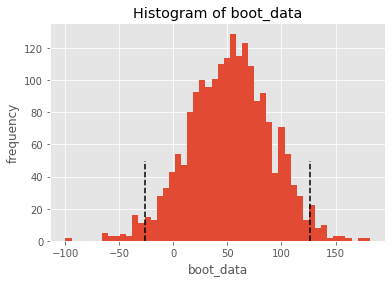

In [110]:
booted_data_mean = get_bootstrap(users_control_1_attr0.total_revenue, \
                            users_test_attr0.total_revenue, boot_it = 2000)

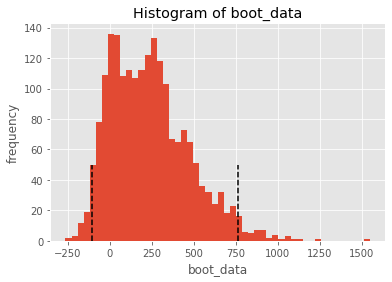

In [111]:
booted_data_mean = get_bootstrap(users_control_1_attr238.total_revenue, \
                            users_test_attr238.total_revenue, boot_it = 2000)

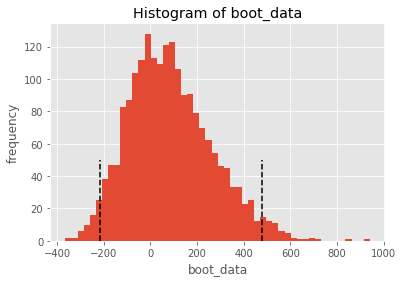

In [112]:
booted_data_mean = get_bootstrap(users_control_1_attr518.total_revenue, \
                            users_test_attr518.total_revenue, boot_it = 2000)

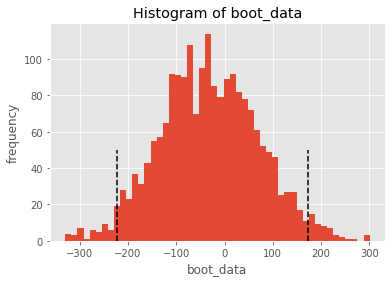

In [113]:
booted_data_mean = get_bootstrap(users_control_1_attrmax.total_revenue, \
                            users_test_attrmax.total_revenue, boot_it = 2000)

In [114]:
users_control_1_views1 = users_control_1.query("views_count <= 1")
users_control_1_views6 = users_control_1.query("views_count > 1" and "views_count <= 6")
users_control_1_views21 = users_control_1.query("views_count > 6" and "views_count <= 21")
users_control_1_viewsmax = users_control_1.query("views_count > 21")

In [115]:
users_test_views1 = users_test.query("views_count <= 1")
users_test_views6 = users_test.query("views_count > 1" and "views_count <= 6")
users_test_views21 = users_test.query("views_count > 6" and "views_count <= 21")
users_test_viewsmax = users_test.query("views_count > 21")

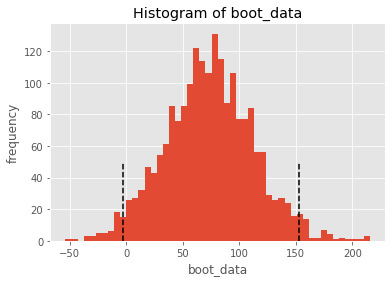

In [116]:
booted_data_mean = get_bootstrap(users_control_1_views1.total_revenue, \
                            users_test_views1.total_revenue, boot_it = 2000)

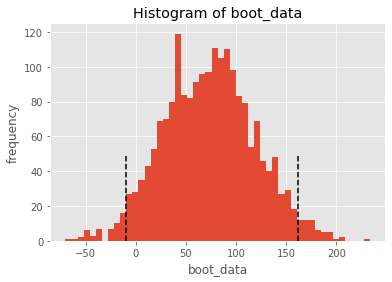

In [117]:
booted_data_mean = get_bootstrap(users_control_1_views6.total_revenue, \
                            users_test_views6.total_revenue, boot_it = 2000)

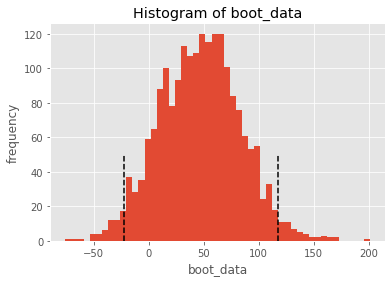

In [118]:
booted_data_mean = get_bootstrap(users_control_1_views21.total_revenue, \
                            users_test_views21.total_revenue, boot_it = 2000)

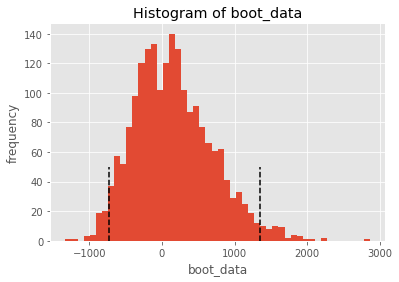

In [119]:
booted_data_mean = get_bootstrap(users_control_1_viewsmax.total_revenue, \
                            users_test_viewsmax.total_revenue, boot_it = 2000)

Выводы
Я бы назвала эксперимент отчасти успешным, то есть показательным, только если в выборку включены только те страны, где изменялась цена за подписку. Сплит данных прошел успешно.

Все пользователи суммарно приносят примерно те же деньги, что и до нововведения. Средняя выручка на платящего пользователя выросла. Однако однозначного вывода о падении конверсии мы сделать не можем: стат тест подтверждает это только в 1 из 3 комбинаций данных. Хотя остальные комбинации в тестах тоже близки к стат значимым, а значит, я бы последила за конверсией еще, тревожные звоночки у нас есть.
Если нас устраивает такое положение (нестабильная конверсия, но общая сумма денег та же), то нововведение можно раскатывать. Но при этом вводить какие-то привлекающие факторы, чтобы все же вернуть людей к подписке. То есть по крайней мере, оно не делает хуже :)